In [7]:
import pandas as pd
new_data=pd.read_csv(r'C:\Users\hilmi\Downloads\titanic-passengers.csv',sep=(';'))
new_data.head(21)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [8]:
#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(new_data)

In [9]:
new_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,G6,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,G6,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,G6,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,G6,S


In [10]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [11]:
#features extraction
x=new_data.drop(['Survived','Name','Cabin','Ticket','Embarked'], axis=1)
y= new_data["Survived"]

In [12]:
new_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,G6,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,G6,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,G6,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,G6,S


In [13]:

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
tree_d= tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')  
tree_d.fit(x_train, y_train)   #fitting our model
y_pred=tree_d.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8044692737430168


In [14]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

[Text(167.4, 190.26, 'X[2] <= 0.5\nentropy = 0.955\nsamples = 712\nvalue = [444, 268]'),
 Text(83.7, 135.9, 'X[1] <= 2.5\nentropy = 0.835\nsamples = 252\nvalue = [67, 185]'),
 Text(41.85, 81.53999999999999, 'X[3] <= 2.5\nentropy = 0.297\nsamples = 133\nvalue = [7, 126]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.267\nsamples = 132\nvalue = [6, 126]'),
 Text(125.55000000000001, 81.53999999999999, 'X[6] <= 23.35\nentropy = 1.0\nsamples = 119\nvalue = [60, 59]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.977\nsamples = 95\nvalue = [39, 56]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.544\nsamples = 24\nvalue = [21, 3]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 1.5\nentropy = 0.681\nsamples = 460\nvalue = [377, 83]'),
 Text(209.25, 81.53999999999999, 'X[6] <= 26.144\nentropy = 0.943\nsamples = 100\nvalue = [64, 36]'),
 Text(188.32500000000002, 27.180000000000007, 'entropy = 0.0\

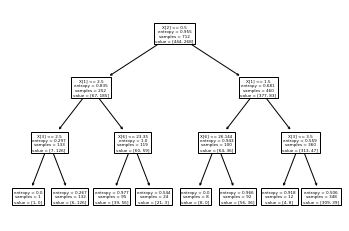

In [15]:
tree.plot_tree(tree_d)

# reading the tree branches and concluding a predicition manually

#### the root node which is the most important attribute used to make predicition is "sex" attribute. Tree branches represent the outcome of the splitting test, it is a binary test based on a binary comparator, if test value is inferior or equal to 0.5 which means that the passenger is a female the the branch value is True, otherwise if the root node test value is above 0.5 (male passenger) then the brach value is False

# changing decision tree parameters

In [20]:
dtree=tree.DecisionTreeClassifier(criterion="gini",splitter='random', max_leaf_nodes=3, min_samples_leaf=50,max_depth=3)

In [21]:
#Features extraction
x=new_data.drop(['Survived','Name','Cabin','Ticket','Embarked'], axis=1)
y=new_data['Survived']

#splitting data
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=10)

#Applying tree algorith
dtree.fit(x_train, y_train)
y_pred=dtree.predict(x_test)
print("score:{}".format(accuracy_score(y_test,y_pred)))

score:0.770949720670391


# Using random forest prediction model

In [29]:
from sklearn import metrics # Importing metrics to test accuracy 
from sklearn.ensemble import RandomForestClassifier # importing the random forest classifier 

#Apllying the random forest model to our data 
clf=RandomForestClassifier(n_estimators=10)
clf.fit(x_train, y_train)
y_=clf.predict(x_test)
print("Accuracy : ", metrics.accuracy_score(y_test, y_))

Accuracy :  0.8435754189944135


# Changing the number of estimators

In [30]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_=clf.predict(x_test)
print("Accuracy : ", metrics.accuracy_score(y_test, y_))

Accuracy :  0.8547486033519553


In [31]:
clf=RandomForestClassifier(n_estimators=5)
clf.fit(x_train, y_train)
y_=clf.predict(x_test)
print("Accuracy : ", metrics.accuracy_score(y_test, y_))

Accuracy :  0.8100558659217877


In [32]:

clf=RandomForestClassifier(n_estimators=70)
clf.fit(x_train, y_train)
y_=clf.predict(x_test)
print("Accuracy : ", metrics.accuracy_score(y_test, y_))

Accuracy :  0.8547486033519553
